Name:Anirudh Narayan Pradhan<br>Reg.No. 22551<br>Class: I MTech (CS)<br>DMACS<br>SSSIHL

# Insurance
Mini project backend

### Importing the required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score,accuracy_score

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

## Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Csv_Files/newinsure1.csv',index_col=0)

In [ ]:
# df=pd.read_csv('/content/newinsure1.csv')

## Visualizing data

0 corresponds to the Personal insurance type<br>1 corresponds to the Corporate insurance type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8756 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             8756 non-null   object
 1   Education         8756 non-null   object
 2   EmploymentStatus  8756 non-null   object
 3   Gender            8756 non-null   object
 4   Income            8756 non-null   int64 
 5   Location Code     8756 non-null   object
 6   Marital Status    8756 non-null   object
 7   Vehicle Class     8756 non-null   object
 8   Vehicle Size      8756 non-null   object
 9   Policy            8756 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 752.5+ KB


In [ ]:
df.head()

,State,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Vehicle Class,Vehicle Size,Policy
0,Washington,Bachelor,Employed,F,56274,Suburban,Married,Two-Door Car,Medsize,1
1,Arizona,Bachelor,Unemployed,F,0,Suburban,Single,Four-Door Car,Medsize,0
2,Nevada,Bachelor,Employed,F,48767,Suburban,Married,Two-Door Car,Medsize,0
3,California,Bachelor,Unemployed,M,0,Suburban,Married,SUV,Medsize,1
4,Washington,Bachelor,Employed,M,43836,Rural,Single,Four-Door Car,Medsize,0


In [ ]:
df.Policy.value_counts()

0    6788
1    1968
Name: Policy, dtype: int64

## Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [ ]:
from sklearn.pipeline import Pipeline
numerical_pipeline = Pipeline([('imputer',imputer),('std_scaler',std_scaler)])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder()

In [ ]:
numerical_attri = list(df.select_dtypes(exclude="object").columns)
categorical_attri = list(df.select_dtypes(include="object").columns)
# numerical_attri.head
# categorical_attri.remove("Policy")
print(categorical_attri)
print(numerical_attri)
numerical_attri.remove("Policy")
print(numerical_attri)

['State', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Vehicle Class', 'Vehicle Size']
['Income', 'Policy']
['Income']


In [ ]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([("num",numerical_pipeline,numerical_attri),("cat",categorical_encoder,categorical_attri)])

### Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(test_size=0.2,random_state=42)
splitt=sss.split(X=df,y = df.Policy)
for train_index,test_index in splitt:
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [ ]:
strat_train_set.head()

,State,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Vehicle Class,Vehicle Size,Policy
8411,Washington,College,Employed,M,52464,Suburban,Married,Four-Door Car,Medsize,0
5239,California,College,Employed,F,88375,Rural,Divorced,Four-Door Car,Medsize,0
2280,Washington,High School or Below,Employed,F,32314,Suburban,Married,Four-Door Car,Medsize,0
8508,California,College,Retired,M,25251,Suburban,Divorced,Four-Door Car,Medsize,1
2772,Nevada,College,Employed,F,59414,Urban,Married,Two-Door Car,Medsize,0


In [ ]:
X_train=strat_train_set.copy()
y_train=strat_train_set.Policy.copy()

In [ ]:
y_train.head()

8411    0
5239    0
2280    0
8508    1
2772    0
Name: Policy, dtype: int64

In [ ]:
X_train.drop(columns='Policy',inplace=True)

In [ ]:
X_train.head()

,State,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Vehicle Class,Vehicle Size
8411,Washington,College,Employed,M,52464,Suburban,Married,Four-Door Car,Medsize
5239,California,College,Employed,F,88375,Rural,Divorced,Four-Door Car,Medsize
2280,Washington,High School or Below,Employed,F,32314,Suburban,Married,Four-Door Car,Medsize
8508,California,College,Retired,M,25251,Suburban,Divorced,Four-Door Car,Medsize
2772,Nevada,College,Employed,F,59414,Urban,Married,Two-Door Car,Medsize


### Encoding the categorical attributes

In [ ]:
x_train=full_pipeline.fit_transform(X_train)

### Preprocessing for test data

In [ ]:
X_test=strat_test_set.copy()
y_test=strat_test_set.Policy.copy()

In [ ]:
X_test.drop(columns='Policy',inplace=True)

In [ ]:
x_test=full_pipeline.fit_transform(X_test)

## SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
param_grid = {'C':  np.arange(2, 10, 2),'gamma': np.arange(0.1, 1, 0.2),'kernel': ['linear','poly']}

grid = HalvingGridSearchCV(svc, param_grid, verbose = 3)

In [ ]:
grid.fit(x_train,y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 259
max_resources_: 7004
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 40
n_resources: 259
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.826, test=0.765) total time=   0.0s
[CV 2/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.797, test=0.765) total time=   0.0s
[CV 3/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.758, test=0.824) total time=   0.0s
[CV 4/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.725, test=0.863) total time=   0.0s
[CV 5/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.768, test=0.863) total time=   0.0s
[CV 1/5] END C=2, gamma=0.1, kernel=poly;, score=(train=0.845, test=0.765) total time=   0.0s
[CV 2/5] END C=2, gamma=0.1, kernel=poly;, score=(train=0.821, test=0.765) total time=   0.0s
[CV 3/5] END C=2, gamma=0.1, kernel=poly;, score=(train=0.816, test=0.

HalvingGridSearchCV(estimator=SVC(),
                    param_grid={'C': array([2, 4, 6, 8]),
                                'gamma': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                'kernel': ['linear', 'poly']},
                    verbose=3)

In [ ]:
grid.best_params_

{'C': 6, 'gamma': 0.7000000000000001, 'kernel': 'linear'}

### Predicting the restults

In [ ]:
svc_predictions=grid.predict(x_test)

### Confusion matrix for SVM

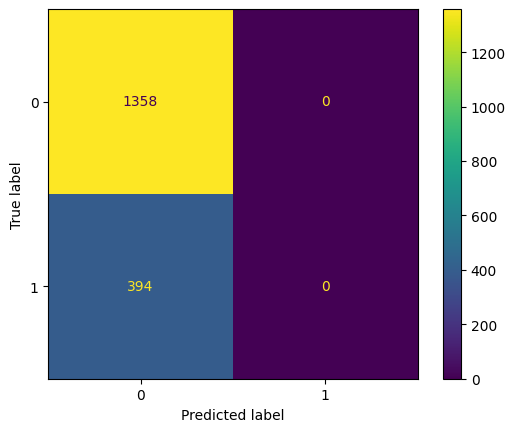

In [ ]:
conf_svm=confusion_matrix(y_test,svc_predictions)
disp=ConfusionMatrixDisplay(conf_svm)
disp.plot()

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [ ]:
x_smt,y_smt=smote.fit_resample(x_train,y_train)

In [ ]:
x_smt.shape

(10860, 33)

In [ ]:
y_smt.shape

(10860,)

In [ ]:
y_smt.value_counts()

0    5430
1    5430
Name: Policy, dtype: int64

## smote SVM

In [ ]:
grid_smote_svm = HalvingGridSearchCV(svc, param_grid, verbose = 3)

In [ ]:
grid_smote_svm.fit(x_smt,y_smt)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 402
max_resources_: 10860
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 40
n_resources: 402
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.623, test=0.512) total time=   0.0s
[CV 2/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.648, test=0.537) total time=   0.0s
[CV 3/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.620, test=0.588) total time=   0.0s
[CV 4/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.598, test=0.500) total time=   0.0s
[CV 5/5] END C=2, gamma=0.1, kernel=linear;, score=(train=0.648, test=0.588) total time=   0.0s
[CV 1/5] END C=2, gamma=0.1, kernel=poly;, score=(train=0.826, test=0.475) total time=   0.0s
[CV 2/5] END C=2, gamma=0.1, kernel=poly;, score=(train=0.826, test=0.525) total time=   0.0s
[CV 3/5] END C=2, gamma=0.1, kernel=poly;, score=(train=0.807, test=0

HalvingGridSearchCV(estimator=SVC(),
                    param_grid={'C': array([2, 4, 6, 8]),
                                'gamma': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                'kernel': ['linear', 'poly']},
                    verbose=3)

In [ ]:
prediction_svm_smote=grid_smote_svm.predict(x_test)

### Confusion matrix

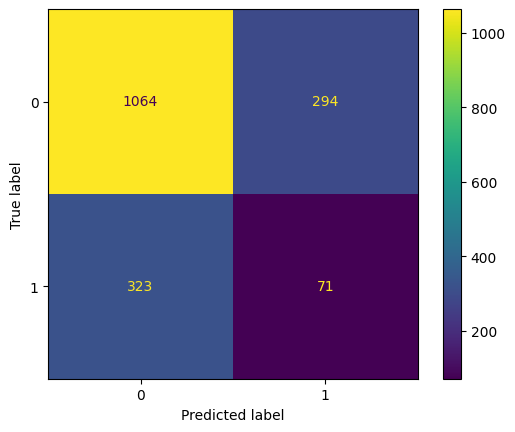

In [ ]:
conf_svm_smote=confusion_matrix(y_test,prediction_svm_smote)
disp=ConfusionMatrixDisplay(conf_svm_smote)
disp.plot()

In [ ]:


prec = precision_score(y_test, prediction_svm_smote, average='macro')
recall= recall_score (y_test, prediction_svm_smote, average='macro')
f1 = f1_score(y_test, prediction_svm_smote, average='macro')
acc= accuracy_score(y_test, prediction_svm_smote)

print(f"precision score = {prec}")
print(f"recall score = {recall}")
print(f"f1_score = {f1}")
print(f"accuracy= {acc}")

precision score = 0.48082191780821915
recall score = 0.48185410016222724
f1_score = 0.48115798037394614
accuracy= 0.6478310502283106


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=5,random_state=42)

### for normal imbalanced dataset

In [ ]:
log_reg_n = LogisticRegression(C=5,random_state=42)

In [ ]:
log_reg_n.fit(x_train,y_train)

LogisticRegression(C=5, random_state=42)

In [ ]:
predictions_logreg_n=log_reg_n.predict(x_test)

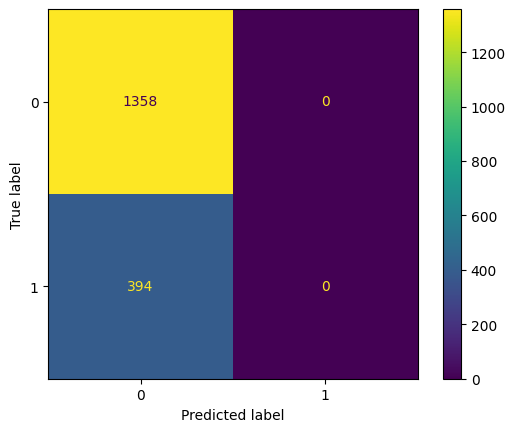

In [ ]:
conf_log_n=confusion_matrix(y_test,predictions_logreg_n)
disp_n=ConfusionMatrixDisplay(conf_log_n)
disp_n.plot()

### for smote balanced data

In [ ]:
log_reg= LogisticRegression(C=5,random_state=42)

In [ ]:
log_reg.fit(x_smt,y_smt)

LogisticRegression(C=5, random_state=42)

In [ ]:
predictions_logreg=log_reg.predict(x_test)

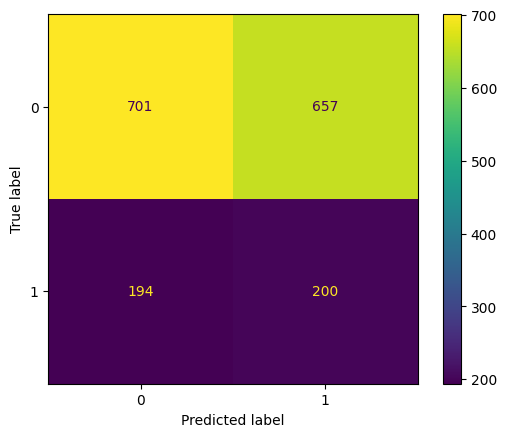

In [ ]:
conf_log=confusion_matrix(y_test,predictions_logreg)
disp=ConfusionMatrixDisplay(conf_log)
disp.plot()

In [ ]:
prec = precision_score(y_test, predictions_logreg, average='macro')
recall= recall_score (y_test, predictions_logreg, average='macro')
f1 = f1_score(y_test, predictions_logreg, average='macro')
acc= accuracy_score(y_test, predictions_logreg)

print(f"precision score = {prec}")
print(f"recall score = {recall}")
print(f"f1_score = {f1}")
print(f"accuracy= {acc}")

precision score = 0.5083062260842357
recall score = 0.5119072538743898
f1_score = 0.47101280360531816
accuracy= 0.514269406392694


## Saving the trained model for use in the future

In [ ]:
from joblib import dump, load
dump(grid_smote_svm, 'model.joblib')

['model.joblib']